<a href="https://colab.research.google.com/github/sdasmaha/Ml_Engineers_445/blob/master/ML_HW_Notebook2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook Excercise #2
#Srinjoy DasMahapatra

IDE => Google Colab Pro

In [1]:
import numpy as np
import pandas as pd
from scipy import stats as sps
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Latex


In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
df_iot_tel = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/BAJWA-ML/Notebook 2/iot_telemetry_dataset.csv")

# 1. Feature Engineering for _Environmental Sensor Telemetry Data_

## Problem 1.1

###(a)

It is an unsupervised machine learning task since the final outcome is to determine if a person is near an IOT device. But there are no time stamps which states that people are near the IOT device in the dataset.

### (b)

In [4]:
df_iot_tel.head(5)

,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000


In [5]:
print(df_iot_tel.shape) 

(405184, 9)


There are **405,184** data samples in the dataset.

### (c)



In [6]:
df_iot_tel['device'].dtypes

dtype('O')

We can see the MAC address is of datatype=> **O** (Object)

In [7]:
df_iot_tel['device'].where(df_iot_tel['device'] == '00:0f:00:70:91:0a').value_counts()

00:0f:00:70:91:0a    111815
Name: device, dtype: int64

There are **111,815** data samples with the MAC address 00:0f:00:70:91:0a 

### (d)

In [8]:
df_iot_tel['device'].where(df_iot_tel['device'] == '1c:bf:ce:15:ec:4d').value_counts()

1c:bf:ce:15:ec:4d    105918
Name: device, dtype: int64

There are **105,918** data samples with the MAC address 1c:bf:ce:15:ec:4d


### (e)

In [9]:
df_iot_tel['device'].where(df_iot_tel['device'] == 'b8:27:eb:bf:9d:51').value_counts()

b8:27:eb:bf:9d:51    187451
Name: device, dtype: int64

There are **187,451** data samples with the MAC address b8:27:eb:bf:9d:51

**Adding all the MAC addresses individually we get 405184.  Hence there is only 3 MAC addresses in total**

## Problem 1.2

In [10]:
df_iot_tel.dtypes

ts          float64
device       object
co          float64
humidity    float64
light          bool
lpg         float64
motion         bool
smoke       float64
temp        float64
dtype: object

 The problem mentions most of the challenges that otherwise needed to be worked on : 
 1.  No missing Entries
 2. pandas.get_dummies() can be used 


### (a)

**Device**

In [11]:
MAC_types = df_iot_tel['device']
dum_df = pd.get_dummies(MAC_types, prefix="MAC:" )
MAC_df = df_iot_tel.join(dum_df)
MAC_df = MAC_df.drop(columns = 'device')
MAC_df.head(5)

,ts,co,humidity,light,lpg,motion,smoke,temp,MAC:_00:0f:00:70:91:0a,MAC:_1c:bf:ce:15:ec:4d,MAC:_b8:27:eb:bf:9d:51
0,1.594512e+09,0.004956,51.000000,False,0.007651,False,0.020411,22.700000,0,0,1
1,1.594512e+09,0.002840,76.000000,False,0.005114,False,0.013275,19.700001,1,0,0
2,1.594512e+09,0.004976,50.900000,False,0.007673,False,0.020475,22.600000,0,0,1
3,1.594512e+09,0.004403,76.800003,True,0.007023,False,0.018628,27.000000,0,1,0
4,1.594512e+09,0.004967,50.900000,False,0.007664,False,0.020448,22.600000,0,0,1


**Light**

In [12]:
light_types = MAC_df['light']
dum_df_light = pd.get_dummies(light_types, prefix="Light:" )
light_df = MAC_df.join(dum_df_light)
light_df = light_df.drop(columns = 'light')
light_df.head(5)

,ts,co,humidity,lpg,motion,smoke,temp,MAC:_00:0f:00:70:91:0a,MAC:_1c:bf:ce:15:ec:4d,MAC:_b8:27:eb:bf:9d:51,Light:_False,Light:_True
0,1.594512e+09,0.004956,51.000000,0.007651,False,0.020411,22.700000,0,0,1,1,0
1,1.594512e+09,0.002840,76.000000,0.005114,False,0.013275,19.700001,1,0,0,1,0
2,1.594512e+09,0.004976,50.900000,0.007673,False,0.020475,22.600000,0,0,1,1,0
3,1.594512e+09,0.004403,76.800003,0.007023,False,0.018628,27.000000,0,1,0,0,1
4,1.594512e+09,0.004967,50.900000,0.007664,False,0.020448,22.600000,0,0,1,1,0


**Motion**

In [13]:
motion_types = light_df['motion']
dum_df_motion = pd.get_dummies(motion_types, prefix="Motion:" )
motion_df = light_df.join(dum_df_motion)
motion_df = motion_df.drop(columns = 'motion')
one_hot_encoded_df = motion_df
one_hot_encoded_df.head(5)

,ts,co,humidity,lpg,smoke,temp,MAC:_00:0f:00:70:91:0a,MAC:_1c:bf:ce:15:ec:4d,MAC:_b8:27:eb:bf:9d:51,Light:_False,Light:_True,Motion:_False,Motion:_True
0,1.594512e+09,0.004956,51.000000,0.007651,0.020411,22.700000,0,0,1,1,0,1,0
1,1.594512e+09,0.002840,76.000000,0.005114,0.013275,19.700001,1,0,0,1,0,1,0
2,1.594512e+09,0.004976,50.900000,0.007673,0.020475,22.600000,0,0,1,1,0,1,0
3,1.594512e+09,0.004403,76.800003,0.007023,0.018628,27.000000,0,1,0,0,1,1,0
4,1.594512e+09,0.004967,50.900000,0.007664,0.020448,22.600000,0,0,1,1,0,1,0


### (b)

In [17]:
one_hot_encoded_df.loc[one_hot_encoded_df["MAC:_00:0f:00:70:91:0a"] ==1,'co':'temp'] = one_hot_encoded_df.loc[one_hot_encoded_df["MAC:_00:0f:00:70:91:0a"] ==1,'co':'temp'] - one_hot_encoded_df.loc[one_hot_encoded_df["MAC:_00:0f:00:70:91:0a"] ==1,'co':'temp'].mean()
one_hot_encoded_df.loc[one_hot_encoded_df["MAC:_00:0f:00:70:91:0a"] ==1,'co':'temp'] = one_hot_encoded_df.loc[one_hot_encoded_df["MAC:_00:0f:00:70:91:0a"] ==1,'co':'temp'] / one_hot_encoded_df.loc[one_hot_encoded_df["MAC:_00:0f:00:70:91:0a"] ==1,'co':'temp'].std()

one_hot_encoded_df.loc[one_hot_encoded_df["MAC:_1c:bf:ce:15:ec:4d"] ==1,'co':'temp'] = one_hot_encoded_df.loc[one_hot_encoded_df["MAC:_1c:bf:ce:15:ec:4d"] ==1,'co':'temp'] - one_hot_encoded_df.loc[one_hot_encoded_df["MAC:_1c:bf:ce:15:ec:4d"] ==1,'co':'temp'].mean()
one_hot_encoded_df.loc[one_hot_encoded_df["MAC:_1c:bf:ce:15:ec:4d"] ==1,'co':'temp'] = one_hot_encoded_df.loc[one_hot_encoded_df["MAC:_1c:bf:ce:15:ec:4d"] ==1,'co':'temp'] / one_hot_encoded_df.loc[one_hot_encoded_df["MAC:_1c:bf:ce:15:ec:4d"] ==1,'co':'temp'].std()

one_hot_encoded_df.loc[one_hot_encoded_df["MAC:_b8:27:eb:bf:9d:51"] ==1,'co':'temp'] = one_hot_encoded_df.loc[one_hot_encoded_df["MAC:_b8:27:eb:bf:9d:51"] ==1,'co':'temp'] - one_hot_encoded_df.loc[one_hot_encoded_df["MAC:_b8:27:eb:bf:9d:51"] ==1,'co':'temp'].mean()
one_hot_encoded_df.loc[one_hot_encoded_df["MAC:_b8:27:eb:bf:9d:51"] ==1,'co':'temp'] = one_hot_encoded_df.loc[one_hot_encoded_df["MAC:_b8:27:eb:bf:9d:51"] ==1,'co':'temp'] / one_hot_encoded_df.loc[one_hot_encoded_df["MAC:_b8:27:eb:bf:9d:51"] ==1,'co':'temp'].std()


Verifying

In [ ]:
one_hot_encoded_df.loc[one_hot_encoded_df["MAC:_00:0f:00:70:91:0a"] ==1,'co':'temp'].mean()

co         -9.766295e-13
humidity    1.754900e-14
lpg         1.628100e-13
smoke       2.056039e-12
temp        2.647922e-15
dtype: float64

In [ ]:
one_hot_encoded_df.loc[one_hot_encoded_df["MAC:_00:0f:00:70:91:0a"] ==1,'co':'temp'].var()

co          1.0
humidity    1.0
lpg         1.0
smoke       1.0
temp        1.0
dtype: float64

In [ ]:
one_hot_encoded_df.loc[one_hot_encoded_df["MAC:_1c:bf:ce:15:ec:4d"] ==1,'co':'temp'].mean()

co          2.205642e-13
humidity    3.637035e-14
lpg        -4.556827e-13
smoke      -8.206347e-13
temp       -3.093863e-14
dtype: float64

In [ ]:
one_hot_encoded_df.loc[one_hot_encoded_df["MAC:_1c:bf:ce:15:ec:4d"] == 1,'co':'temp'].var()

co          1.0
humidity    1.0
lpg         1.0
smoke       1.0
temp        1.0
dtype: float64

In [ ]:
one_hot_encoded_df.loc[one_hot_encoded_df["MAC:_b8:27:eb:bf:9d:51"] == 1,'co':'temp'].mean()

co         -1.153261e-12
humidity    4.075466e-12
lpg         3.997145e-12
smoke       5.894984e-13
temp       -2.763669e-12
dtype: float64

In [ ]:
one_hot_encoded_df.loc[one_hot_encoded_df["MAC:_b8:27:eb:bf:9d:51"] == 1,'co':'temp'].var()

co          1.0
humidity    1.0
lpg         1.0
smoke       1.0
temp        1.0
dtype: float64

### (c)

In [ ]:
one_hot_encoded_df.head(20)

,ts,co,humidity,lpg,smoke,temp,MAC:_00:0f:00:70:91:0a,MAC:_1c:bf:ce:15:ec:4d,MAC:_b8:27:eb:bf:9d:51,Light:_False,Light:_True,Motion:_False,Motion:_True
0,1.594512e+09,-1.080793,0.098428,-1.093491,-1.091260,0.871610,0,0,1,1,0,1,0
1,1.594512e+09,-0.464451,0.281222,-0.458333,-0.460392,0.524162,1,0,0,1,0,1,0
2,1.594512e+09,-1.044864,0.045488,-1.056107,-1.054137,0.664099,0,0,1,1,0,1,0
3,1.594512e+09,0.687051,1.664629,0.696248,0.694633,0.480890,0,1,0,0,1,1,0
4,1.594512e+09,-1.060344,0.045488,-1.072209,-1.070127,0.664099,0,0,1,1,0,1,0
5,1.594512e+09,0.649527,1.787605,0.659043,0.657370,0.480890,0,1,0,0,1,1,0
6,1.594512e+09,-1.044841,0.045488,-1.056083,-1.054113,0.664099,0,0,1,1,0,1,0
7,1.594512e+09,-0.398156,0.281222,-0.383561,-0.387058,0.524162,1,0,0,1,0,1,0
8,1.594512e+09,0.507419,1.787605,0.517887,0.516039,0.480890,0,1,0,0,1,1,0
9,1.594512e+09,-1.055167,0.045488,-1.066824,-1.064779,0.664099,0,0,1,1,0,1,0


### (d)

ts variable in the dataset represents the the time series data has not been touched during pre processing because it is not used to calculate the final outcome which is to determine if a person is near the IOT device.

_Your answer for 1.2d goes here_

### (e)

## Note - Run this section before 1.2b and after 1.2a

motion_df = dataset after one hot encoding but before standardization


In [14]:
device1 = motion_df['MAC:_00:0f:00:70:91:0a'] == 1
device2 = motion_df['MAC:_1c:bf:ce:15:ec:4d'] == 1
device3 = motion_df['MAC:_b8:27:eb:bf:9d:51'] == 1

In [15]:
mean_co = [motion_df.loc[device1,'co'].mean(),motion_df.loc[device2,'co'].mean(),motion_df.loc[device2,'co'].mean()]
mean_humidity = [motion_df.loc[device1,'humidity'].mean(),motion_df.loc[device2,'humidity'].mean(),motion_df.loc[device3,'humidity'].mean()]
mean_lpg = [motion_df.loc[device1,'lpg'].mean(),motion_df.loc[device2,'lpg'].mean(),motion_df.loc[device3,'lpg'].mean()]
mean_smoke = [motion_df.loc[device1,'smoke'].mean(),motion_df.loc[device2,'smoke'].mean(),motion_df.loc[device3,'smoke'].mean()]
mean_temp = [motion_df.loc[device1,'temp'].mean(),motion_df.loc[device2,'temp'].mean(),motion_df.loc[device3,'temp'].mean()]

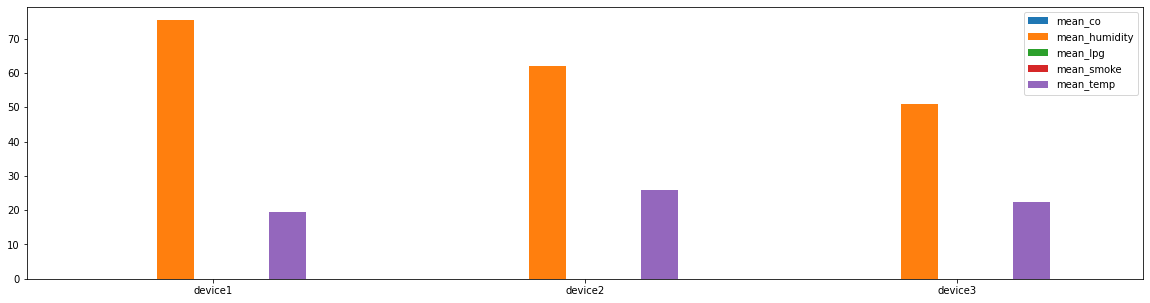

In [16]:
index = ['device1','device2','device3']
df = pd.DataFrame({'mean_co': mean_co,'mean_humidity': mean_humidity, 'mean_lpg': mean_lpg, 'mean_smoke': mean_smoke, 'mean_temp':mean_temp}, index = index)
ax = df.plot.bar(rot=0,figsize=(20,5))


In [17]:
var_co = [motion_df.loc[device1,'co'].var(),motion_df.loc[device2,'co'].var(),motion_df.loc[device3,'co'].var()]
var_humidity = [motion_df.loc[device1,'humidity'].var(),motion_df.loc[device2,'humidity'].var(),motion_df.loc[device3,'humidity'].var()]
var_lpg = [motion_df.loc[device1,'lpg'].var(),motion_df.loc[device2,'lpg'].var(),motion_df.loc[device3,'lpg'].var()]
var_smoke = [motion_df.loc[device1,'smoke'].var(),motion_df.loc[device2,'smoke'].var(),motion_df.loc[device3,'smoke'].var()]
var_temp = [motion_df.loc[device1,'temp'].var(),motion_df.loc[device2,'temp'].var(),motion_df.loc[device3,'temp'].var()]

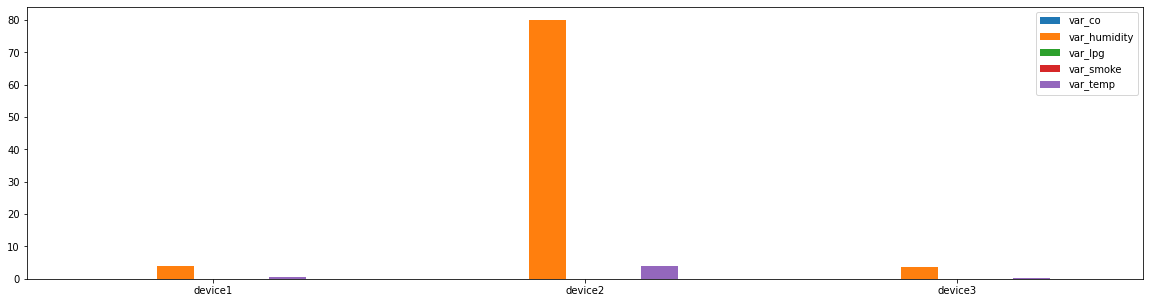

In [18]:
index2 = ['device1','device2','device3']
df2 = pd.DataFrame({'var_co': var_co,'var_humidity': var_humidity, 'var_lpg': var_lpg, 'var_smoke': var_smoke, 'var_temp':var_temp}, index = index)
ax2 = df2.plot.bar(rot=0,figsize=(20,5))

In [ ]:
**Variance of the five independent variables**

## Problem 1.3

In [ ]:
# Code of 1.3 goes here
import scipy.stats as stats
from scipy.stats import kurtosis
from scipy.stats import skew

In [ ]:
df_new = pd.DataFrame()
df_new["mean"] = one_hot_encoded_df[["co","humidity", "lpg", "smoke", "temp"]].mean(axis=1)
df_new["variance"] = one_hot_encoded_df[["co","humidity", "lpg", "smoke", "temp"]].var(axis=1)
df_new["kurtosis"] = one_hot_encoded_df[["co","humidity", "lpg", "smoke", "temp"]].kurtosis(axis=1)
df_new["skewness"] = one_hot_encoded_df[["co","humidity", "lpg", "smoke", "temp"]].skew(axis=1)


In [ ]:
display(one_hot_encoded_df.mean(axis=1))


0         1.226548e+08
1         1.226548e+08
2         1.226548e+08
3         1.226548e+08
4         1.226548e+08
              ...     
405179    1.227080e+08
405180    1.227080e+08
405181    1.227080e+08
405182    1.227080e+08
405183    1.227080e+08
Length: 405184, dtype: float64

In [ ]:
df_new.head(40)

,mean,variance,kurtosis,skewness
0,-0.459101,0.817552,-1.074083,1.004154
1,-0.115558,0.231202,-2.504032,0.751552
2,-0.489104,0.641322,-1.462908,0.934652
3,0.844690,0.218513,4.333335,2.009110
4,-0.498619,0.654782,-1.498953,0.928228
5,0.846887,0.282264,4.631814,2.118134
6,-0.489090,0.641303,-1.462854,0.934662
7,-0.072678,0.195721,-2.357709,0.776345
8,0.761968,0.328947,4.986868,2.232330
9,-0.495437,0.650264,-1.487009,0.930356


# 2. Feature Learning for _Synthetically Generated Data_

## Problem 2.1

### (a)

In [20]:
A = np.random.randn(3,2)
print(A)

[[ 1.32387043 -0.59228478]
 [ 1.16812962 -0.33578035]
 [-0.05898733  0.07227559]]


### (b)

Rank of the random generated matrix


In [21]:
np.linalg.matrix_rank(A, tol=None)

2

### (c)

In [22]:
print(np.linalg.norm(A[0]))

1.4503220923348128


In [23]:
print(np.linalg.norm(A[1]));

1.2154321270785307


In [24]:
print(np.linalg.norm(A[2]))

0.09329128966698329


In [25]:
a = A[0]; print(a)
b = A[1]; print(b)
c = A[2]; print(c)

[ 1.32387043 -0.59228478]
[ 1.16812962 -0.33578035]
[-0.05898733  0.07227559]


In [26]:
print(np.inner(a,b));
print(np.inner(a,c));
print(np.inner(b,c));

1.7453298530424948
-0.12089930434358692
-0.0931735630412914


### (d)

3 unique vectors will only belong the column space of A if they belong to the linear combination of the 3 basis vectors.

Show if this belongs to the subspace corresponding to the column space of A


In [56]:
x1 = np.random.random(3);
x2 = np.random.random(3);
x3 = np.random.random(3);
print(x1);
print(x2);
print(x3);

[0.44379346 0.22244274 0.8541842 ]
[0.90295137 0.06220059 0.35656487]
[0.39008161 0.85804495 0.82439888]


In [57]:
np.linalg.matrix_rank(A, tol=None)

2

In [60]:
np.linalg.matrix_rank(x1, tol=None)

1


 We see that the vectors x1, x2 and x3 are closed under addition and 
scalar multiplication hence they belong to the same subspace S.

If the sets of vectors are the columns of 𝐴 and 𝐵 resp., check that the new matrix 𝐶=[𝐴,𝐵] is such that

𝑟𝑎𝑛𝑘(𝐴)=𝑟𝑎𝑛𝑘(𝐵)=𝑟𝑎𝑛𝑘(𝐶)
Proof: Let 𝑅(𝑀) denote the column space of a matrix 𝑀.

Equality 𝑟𝑎𝑛𝑘(𝐴)=𝑟𝑎𝑛𝑘(𝐶) implies 𝑅(𝐴)=𝑅(𝐶) Equality 𝑟𝑎𝑛𝑘(𝐵)=𝑟𝑎𝑛𝑘(𝐶), implies 𝑅(𝐵)=𝑅(𝐶). Thus 𝑅(𝐴)=𝑅(𝐵). Therefore 𝑟𝑎𝑛𝑘(𝐴)=𝑟𝑎𝑛𝑘(𝐵).

## Problem 2.2

###(a)

In [93]:
b = np.random.randn(2,250)

In [94]:
x = A@b

We can clearly see the data samples when printed are in not a data matrix format when we decide to print a data sample. Hence we save it in data matrix **R** nxp format.

###(b)

Yes, kinda, watch ML videos

###(c)

In [95]:
 X = np.transpose(x)

In [96]:
print(X)

[[-4.20866387e-01 -5.11575742e-01 -1.56859975e-02]
 [-1.56199966e+00 -1.20861303e+00  1.11259631e-01]
 [ 4.91913221e-01  4.46221883e-01 -1.89271963e-02]
 [-5.02322339e-01 -3.26792257e-01  5.09789351e-02]
 [ 1.84785317e+00  1.48190357e+00 -1.18822717e-01]
 [ 7.75408575e-01  6.43804246e-01 -4.44682768e-02]
 [-6.66198958e-01 -6.96368520e-01  3.02558811e-03]
 [ 1.40482175e-01 -3.57751749e-02 -4.54897106e-02]
 [ 1.16636962e+00  1.01102537e+00 -5.64228454e-02]
 [ 2.31984607e+00  1.97553531e+00 -1.20901440e-01]
 [ 7.88548097e-01  5.32567144e-01 -7.52212754e-02]
 [-1.35097558e-01 -5.22618768e-02  2.24607920e-02]
 [ 9.09603494e-01  8.33030227e-01 -3.30545443e-02]
 [-1.75040324e+00 -1.46757426e+00  9.68816538e-02]
 [-2.39159924e-02 -5.05515597e-02 -6.16713722e-03]
 [ 1.71564507e+00  1.64803140e+00 -4.34798329e-02]
 [ 7.19015090e-01  7.46491224e-01 -4.51440898e-03]
 [ 3.47929035e-01  6.03863538e-02 -7.60710767e-02]
 [ 3.83382422e-01  5.42868350e-01  3.31648271e-02]
 [-2.93764737e-01 -1.68670306e-

In [97]:
print(X.shape);

(250, 3)


n = 250
p = 3

###(d)

In [98]:
np.linalg.matrix_rank(X, tol=None)

2

## Problem 2.3

###(a)

In [99]:
SVD = np.linalg.svd(X)

In [100]:
x_1 = pd.DataFrame(list(SVD)) 
print(x_1)

                                                   0
0  [[-0.023601354934270458, -0.06164608567342935,...
1  [27.548516548451737, 2.0740393202214773, 8.547...
2  [[0.764484439901256, 0.6432894078252179, -0.04...


Left Singular Vectors



In [101]:
print(x_1.iloc[0,0])

[[-2.36013549e-02 -6.16460857e-02 -8.15901314e-01 ... -4.98332108e-04
   1.49570335e-02 -4.29119414e-02]
 [-7.17373091e-02  4.14133110e-02  1.09248828e-01 ... -9.29325638e-03
   6.51951800e-02 -4.95914204e-02]
 [ 2.40992957e-02  1.26450265e-02  7.44017782e-03 ... -1.26182735e-01
  -3.77734281e-02 -3.40166492e-03]
 ...
 [ 1.02006932e-01  3.20343265e-02 -4.09825928e-02 ...  9.84077499e-01
  -4.26362767e-03  2.31168307e-03]
 [ 5.09424491e-02 -5.70204943e-02 -4.11777587e-03 ... -4.21868702e-03
   9.94239323e-01  4.69172722e-03]
 [-4.32661394e-02  4.69401402e-02 -3.29442965e-02 ... -9.16943424e-04
   3.43194217e-03  9.95948675e-01]]


singular values = Diagonal Matrix

In [102]:
print(x_1.iloc[1,0])

[2.75485165e+01 2.07403932e+00 8.54779663e-16]


Right Singular Vectors = Orthogonal


In [103]:
print(x_1.iloc[2,0])

[[ 0.76448444  0.64328941 -0.04174061]
 [-0.59588627  0.72988399  0.33494612]
 [-0.2459331   0.23118844 -0.94131228]]


In [105]:
X_T = np.transpose(X)
print(X_T[0,:3])
print(X_T[:3,0])

[-0.42086639 -1.56199966  0.49191322]
[-0.42086639 -0.51157574 -0.015686  ]


In [106]:
XT_X = X_T@X
print(XT_X.shape);

(3, 3)


Matrix XT_X itself


In [107]:
print(XT_X)

[[445.06839183 371.35474995 -25.07576323]
 [371.35474995 316.34916346 -19.32637612]
 [-25.07576323 -19.32637612   1.80484783]]


In [41]:
np.linalg.eigvals(XT_X)

array([ 8.12142674e+02,  5.22442492e+00, -1.24828449e-14])



---



---


###(i)

We can clearly see that the right singular vectors of X correspond to the eigenvectors of(X^T_X).

In [108]:
np.linalg.eig(XT_X)

(array([ 7.58920764e+02,  4.30163910e+00, -1.75505021e-14]),
 array([[-0.76448444, -0.59588627,  0.2459331 ],
        [-0.64328941,  0.72988399, -0.23118844],
        [ 0.04174061,  0.33494612,  0.94131228]]))

In [109]:
print(x_1.iloc[2,0])

[[ 0.76448444  0.64328941 -0.04174061]
 [-0.59588627  0.72988399  0.33494612]
 [-0.2459331   0.23118844 -0.94131228]]




---



###(ii)

Eigen Values of XT_X

In [110]:
np.linalg.eigvals(XT_X)

array([ 7.58920764e+02,  4.30163910e+00, -1.75505021e-14])

Singular Values of X

In [111]:
print(x_1.iloc[1,0])

[2.75485165e+01 2.07403932e+00 8.54779663e-16]


In [112]:
array_singular_vals = [x_1.iloc[1,0]]
array_singular_vals = np.square(array_singular_vals)

We can cleary see that the eigenvales of X^T_X are square of the singular values of X

###(iii)

Energy of XF


In [113]:
np.asarray(array_singular_vals)
print(array_singular_vals)

[[7.58920764e+02 4.30163910e+00 7.30648272e-31]]


In [114]:
sum = np.sum(array_singular_vals)
print("The energy of XF is:", sum)

The energy of XF is: 763.222403122144


###(b)

###(i)

###(ii)

## Problem 2.4


###(a)

We need 2 principal components to capture all variation in the data, because i am still reading the paper man!

###(b)

####(i)

####(ii)



In [115]:
mean_vector = np.mean(X,axis = 0)
print(mean_vector)

[ 0.04113738  0.02016033 -0.00579638]


Like it is mentioned mean centering is not required in the dataset, since we can see the mean vectors have small entries.

###(c)

In [49]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig

In [116]:
print(x_1.iloc[1,0])

[2.75485165e+01 2.07403932e+00 8.54779663e-16]


We know that U = [u1 u2] where the singular vectors correspondign to the k largest singular values of X. Here the first two singular values are the largest and hence they will be our PCA vectors.

Way1

In [117]:
f1  = x_1.iloc[2,0]
print(f1)

[[ 0.76448444  0.64328941 -0.04174061]
 [-0.59588627  0.72988399  0.33494612]
 [-0.2459331   0.23118844 -0.94131228]]


In [118]:
u1 = f1[:,0]
u2 = f1[:,1]

In [119]:
U = [u1, u2]
print(U)

[array([ 0.76448444, -0.59588627, -0.2459331 ]), array([0.64328941, 0.72988399, 0.23118844])]


In [ ]:
U_T = np.transpose(U)
print(U_T)

[[ 0.76448444  0.64328941]
 [-0.59588627  0.72988399]
 [-0.2459331   0.23118844]]


Way2

In [123]:
U_keb = A / np.linalg.norm(A)
U_keb

array([[ 0.69876925, -0.31262152],
       [ 0.61656567, -0.17723259],
       [-0.03113487,  0.03814872]])

In [126]:
xi_hat =  np.matmul(U_keb.T,x)
xi_hat

array([[-0.60902015, -1.84013069,  0.61944822, -0.55408351,  2.20861336,
         0.94016378, -0.89497047,  0.0775232 ,  1.44014347,  2.8428486 ,
         0.88171778, -0.12732421,  1.15024994, -2.13100026, -0.0476881 ,
         2.21631334,  0.96282705,  0.28272273,  0.60157725, -0.31036992,
         2.27456869,  0.83149568, -1.82403636,  1.17394166,  0.93334281,
        -0.37747365, -0.47343126,  2.74342137, -0.34321984,  0.64179303,
        -0.55024745,  2.46407693,  0.88862162, -3.93791728,  2.96281735,
         3.57044755,  2.25882027,  1.16237316, -2.12804775, -2.12460818,
        -0.72223057,  1.602419  ,  2.27856823,  2.41455405, -3.32310091,
         1.26570993,  1.49533133, -2.36838179, -1.27535362,  0.19448043,
         0.66437021,  2.29942983,  2.8479071 ,  2.46336655, -3.98391106,
        -2.17587151,  1.05388816, -0.94883808,  0.83979341,  2.37988119,
         0.76740523, -1.45276706, -0.95227806, -1.53191246,  2.26176061,
        -1.07733211,  2.64864847, -0.87159777, -3.6

In [129]:
xi_hat_reconstruct = np.matmul(U_keb, xi_hat)
xi_hat_reconstruct

array([[-4.94854418e-01, -1.50677661e+00,  5.05876558e-01,
        -4.54984063e-01,  1.80743040e+00,  7.68941352e-01,
        -7.29106524e-01,  6.64607893e-02,  1.17701037e+00,
         2.32411870e+00,  7.23588723e-01, -1.05337157e-01,
         9.39206538e-01, -1.74261714e+00, -3.83876894e-02,
         1.80819597e+00,  7.84479345e-01,  2.35814865e-01,
         4.87515527e-01, -2.55353996e-01,  1.86938498e+00,
         6.75847196e-01, -1.48955896e+00,  9.58619308e-01,
         7.58768881e-01, -3.07092503e-01, -3.83559040e-01,
         2.24565909e+00, -2.77882446e-01,  5.19422483e-01,
        -4.47872379e-01,  2.01883948e+00,  7.30821519e-01,
        -3.22024659e+00,  2.41708617e+00,  2.92479737e+00,
         1.84015910e+00,  9.46653364e-01, -1.73843336e+00,
        -1.73511184e+00, -5.94434382e-01,  1.30979668e+00,
         1.86606987e+00,  1.97676955e+00, -2.71309156e+00,
         1.03394250e+00,  1.22286503e+00, -1.93457039e+00,
        -1.04281365e+00,  1.62829587e-01,  5.47383665e-0

PCA error